Erick Rico Esparza\
03/07/2025

# Proyecto Final - Análisis de Datos Meteorológicos

Este proyecto tiene como objetivo analizar un conjunto de datos meteorológicos simulados que incluye variables como temperatura, precipitación y humedad relativa. A través de un enfoque paso a paso, se realizará limpieza de datos, análisis exploratorio y visual, corrección de inconsistencias y reflexión sobre los resultados obtenidos. El fin es aplicar de manera práctica las herramientas vistas en el curso de análisis de datos en Python, demostrando habilidades tanto técnicas como interpretativas.

## 1. Carga y exploración inicial

En esta primera etapa se cargan los datos, se explora su estructura general y se identifican posibles problemas como valores nulos, tipos de datos incorrectos o valores atípicos. También se observan las características estadísticas básicas de cada variable, lo que permite entender mejor la distribución y el comportamiento inicial del dataset.

### Lectura y carga de CSV

In [ ]:
# Importando librerías a usar
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Importando CSV

df  = pd.read_csv("/content/datos_meteorologicos_simulados.csv")

### Info del DataFrame

In [ ]:
# Obteniendo información básica del DataFrame
print("Número de filas y columnas:")
display(df.describe())

print("\nInformación detallada del DataFrame:\n")
df.info()

Número de filas y columnas:


,Temperatura_Maxima_C,Temperatura_Minima_C,Precipitacion_mm,Humedad_Relativa_%
count,355.000000,365.000000,355.000000,355.000000
mean,25.178873,14.810959,5.235775,69.880282
std,6.516813,5.098728,5.208944,9.918613
min,6.700000,1.500000,0.000000,41.100000
25%,20.450000,11.200000,1.350000,63.000000
50%,25.400000,14.700000,3.800000,70.200000
75%,29.400000,18.200000,7.400000,76.100000
max,52.000000,30.400000,30.900000,99.700000



Información detallada del DataFrame:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 5 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Fecha                 365 non-null    object 
 1   Temperatura_Maxima_C  355 non-null    float64
 2   Temperatura_Minima_C  365 non-null    float64
 3   Precipitacion_mm      355 non-null    float64
 4   Humedad_Relativa_%    355 non-null    float64
dtypes: float64(4), object(1)
memory usage: 14.4+ KB


### Estadísticas básicas

In [ ]:
# Obteniendo un resumen estadístico de las columnas numéricas
print("Resumen estadístico de las columnas numéricas:")
df.describe()

Resumen estadístico de las columnas numéricas:


,Temperatura_Maxima_C,Temperatura_Minima_C,Precipitacion_mm,Humedad_Relativa_%
count,355.000000,365.000000,355.000000,355.000000
mean,25.178873,14.810959,5.235775,69.880282
std,6.516813,5.098728,5.208944,9.918613
min,6.700000,1.500000,0.000000,41.100000
25%,20.450000,11.200000,1.350000,63.000000
50%,25.400000,14.700000,3.800000,70.200000
75%,29.400000,18.200000,7.400000,76.100000
max,52.000000,30.400000,30.900000,99.700000


In [ ]:
# Obteniendo un resumen estadístico de las columnas categóricas
print("Resumen estadístico de columnas categóricas:")
df.describe(include=["O"])

Resumen estadístico de columnas categóricas:


,Fecha
count,365
unique,365
top,2023-12-31
freq,1


Dado que la columna "Fecha" viene de origen como tipo "object", se hace el cambio a tipo "datetime" para un mejor manejo en el futuro:

In [ ]:
# Cambiando tipo a "datetime"
df["Fecha"] = pd.to_datetime(df["Fecha"])

# Confirmando que el tipo de dato haya sido modificado
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 5 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Fecha                 365 non-null    datetime64[ns]
 1   Temperatura_Maxima_C  355 non-null    float64       
 2   Temperatura_Minima_C  365 non-null    float64       
 3   Precipitacion_mm      355 non-null    float64       
 4   Humedad_Relativa_%    355 non-null    float64       
dtypes: datetime64[ns](1), float64(4)
memory usage: 14.4 KB


### Detectando valores nulos

In [ ]:
# Detectando valores nulos
print("Conteo de valores nulos por columna:\n")
display(df.isnull().sum().to_frame(name="Valores nulos"))

Conteo de valores nulos por columna:



,Valores nulos
Fecha,0
Temperatura_Maxima_C,10
Temperatura_Minima_C,0
Precipitacion_mm,10
Humedad_Relativa_%,10


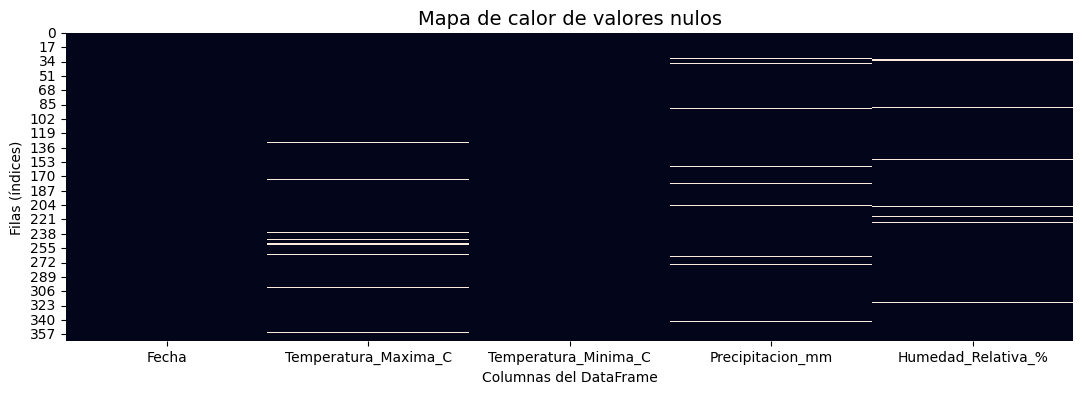

In [ ]:
# Usando un heatmap para visualizar los nulos de otra manera
plt.figure(figsize=(13, 4))
sns.heatmap(df.isnull(), cbar=False)
plt.title("Mapa de calor de valores nulos", fontsize=14)
plt.xlabel("Columnas del DataFrame")
plt.ylabel("Filas (índices)")
plt.show()



Los colores del heatmap anterior ayudan a interpretar mejor el gráfico:
  *   Azul (color base del fondo): valor no nulo,
  *   Blanco: valor nulo.

En otras palabras, las líneas blancas horizontales indican la presencia de valores nulos en esas columnas y filas específicas.

### Detectando posibles duplicados

In [ ]:
# Observando si la frecuencia por mes, corresponde a lo real
print(df["Fecha"].dt.month.value_counts().sort_index())

# Comprobando que el DataFrame solo corresponde a datos del 2023
print(df["Fecha"].dt.year.value_counts())

# Verificando que efectivamente no haya filas duplicadas
print(df.duplicated().sum())

Fecha
1     31
2     28
3     31
4     30
5     31
6     30
7     31
8     31
9     30
10    31
11    30
12    31
Name: count, dtype: int64
Fecha
2023    365
Name: count, dtype: int64
0


### Detectando outliers por columna

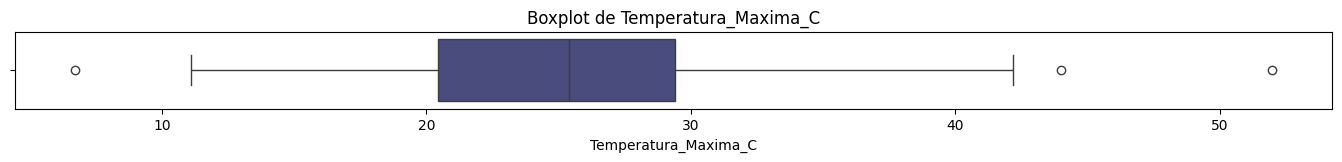

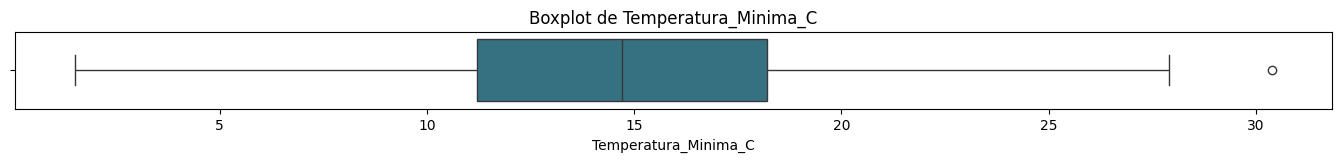

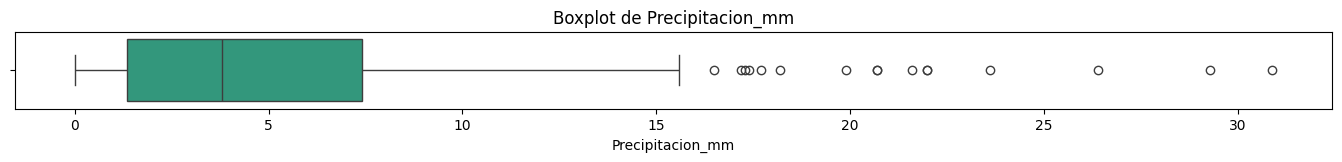

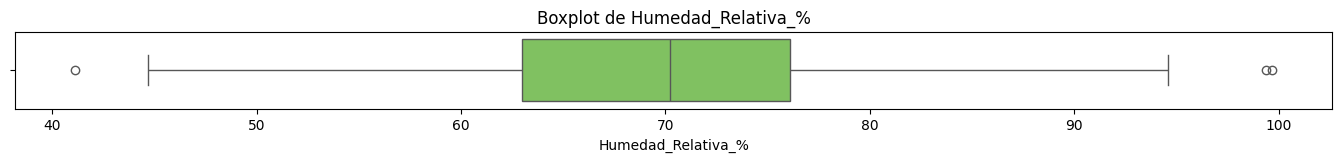

In [ ]:
# Tomando solo las columnas de tipo numérico
num_cols = df.select_dtypes(include=[np.number]).columns

# Usando boxplots para visualizar si hay outliers
paleta = sns.color_palette("viridis", len(num_cols))
for i, col in enumerate(num_cols):
    plt.figure(figsize=(17, 1))
    sns.boxplot(x=df[col], color=paleta[i])
    plt.title(f"Boxplot de {col}")
    plt.show()

Los boxplots anteriores revelan la presencia de outliers en varias columnas, siendo especialmente notorio en la columna de "Precipitación", lo cual podría estar asociado a eventos climáticos extremos como tormentas o huracanes incluso. En las Temperaturas Mínimas y Máximas, los outliers podrían corresponder a picos estacionales — como días excepcionalmente fríos en invierno o extremadamente calurosos en verano — aunque esto deberá analizarse con mayor detalle. En cuanto a la Humedad Relativa, si bien los valores fuera de lo común no son frecuentes, podrían coincidir con condiciones particulares como niebla densa o sequías puntuales.

Además, es importante decir que si esto fuera un proyecto real, estas interpretaciones deberían tomarse con cautela, ya que la falta de contexto sobre la región geográfica donde se hayan tomado los datos es algo a considerar. En la siguiente etapa (limpieza), se evaluará si conservar o eliminar estos valores atípicos según su impacto en el análisis.

### Calculando el número de outliers

In [ ]:
# Calculando número de outliers por columna usando el IQR

# Recorriendo cada columna numérica
for columna in num_cols:
    # Calculando el primer y tercer cuartil
    Q1 = df[columna].quantile(0.25)
    Q3 = df[columna].quantile(0.75)

    # Calculando el rango intercuartílco
    IQR = Q3 - Q1

    # Calculando los límites superior e inferior
    lim_inferior = Q1 - 1.5 * IQR
    lim_superior = Q3 + 1.5 * IQR

    # Contando el número de outliers en cada columna
    num_outliers = ((df[columna] < lim_inferior) | (df[columna] > lim_superior)).sum()

    # Mostrando la cantidad de outliers que hay por columna
    print(f"Número de outliers en la columna {columna}: {num_outliers}")

Número de outliers en la columna Temperatura_Maxima_C: 3
Número de outliers en la columna Temperatura_Minima_C: 1
Número de outliers en la columna Precipitacion_mm: 16
Número de outliers en la columna Humedad_Relativa_%: 3


## 2. Limpieza de datos

En esta sección se realiza la limpieza del conjunto de datos, abordando principalmente los valores nulos y los outliers. El objetivo es preparar los datos para que estén en condiciones óptimas para el análisis posterior, asegurando que no haya errores ni valores extremos que puedan distorsionar los resultados.

In [ ]:
# Checando nuevamente la cantidad de valores nulos para decidir qué hacer
print("Conteo de valores nulos por columna:\n")
display(df.isnull().sum().to_frame(name="Valores nulos"))

Conteo de valores nulos por columna:



,Valores nulos
Fecha,0
Temperatura_Maxima_C,10
Temperatura_Minima_C,0
Precipitacion_mm,10
Humedad_Relativa_%,10


Aunque la cantidad de valores nulos no es muy alta (solo 10 valores en tres columnas distintas cada una — máximo 30 filas que corresponden a menos del 10% del total), es importante analizar si es preferible eliminarlos o imputarlos. Si el análisis fuera muy sensible (por ejemplo, series temporales donde es importante tener los datos de cada día), pódría considerar la imputación; pero como en este caso los datos son simulados y seguramente no correlacionados por día, eliminar esas filas es válido en este análisis. Además, imputar sin contexto geográfico podría generar más ruido que ayuda.

### Asimetría

A pesar de lo dicho anteriormente, a continuación se calcula la asimetría y se observa la distribución de las columnas que interesan para decidir de mejor forma si los nulos se eliminan o se imputan:

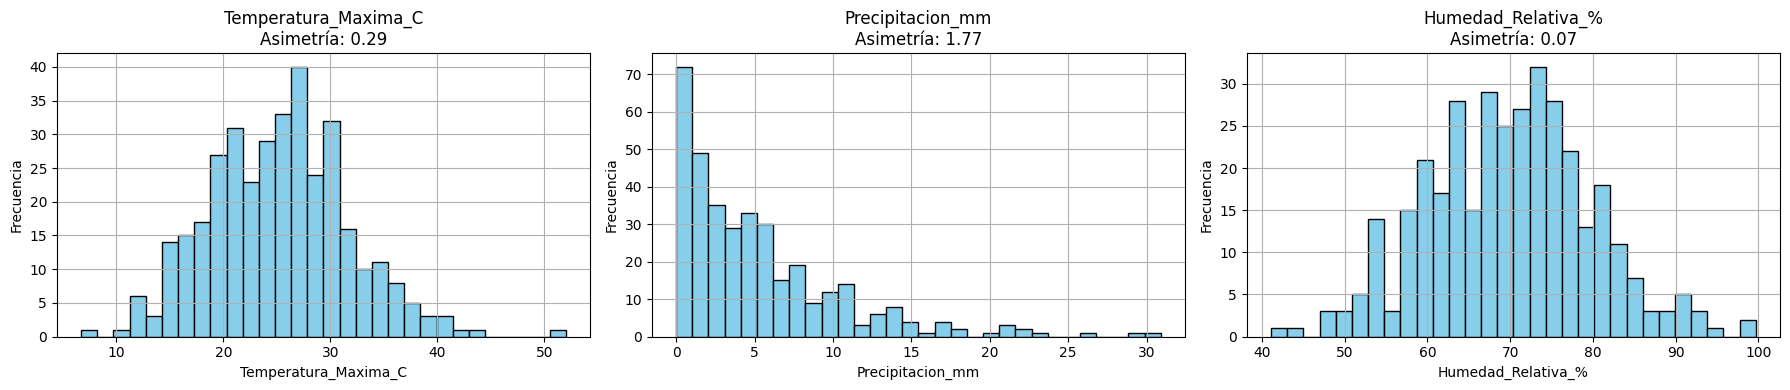

In [ ]:
# Lista de columnas para analizar
columnas = ["Temperatura_Maxima_C", "Precipitacion_mm", "Humedad_Relativa_%"]

# Creando figura y subplots
plt.figure(figsize=(18, 4))

for i, col in enumerate(columnas):
    plt.subplot(1, 3, i + 1)  # 1 fila, 3 columnas
    df[col].hist(bins=30, color="skyblue", edgecolor="black")
    plt.title(f'{col}\nAsimetría: {df[col].skew():.2f}')
    plt.xlabel(col)
    plt.ylabel("Frecuencia")

plt.tight_layout()
plt.show()

Los histogramas son claros para notar cuán sesgados — o no — están los datos de las 3 columnas con datos nulos. Sin embargo, el análisis de asimetría nos permite entender de mejor manera si sus distribuciones están sesgadas. Recordemos que si da cerca de 0, significa que la es distribución simétrica; pero si da > 1 o < -1 tenemos una distribución fuertemente sesgada:

*   Temperatura_Maxima_C: skew ≈ 0.28; esto significa que se acerca a la simetría y se podría imputar con la media.
*   Precipitacion_mm: skew ≈ 1.77; en este caso, es notorio el sesgo a la derecha, por lo que sería mejor eliminar estas filas, pero si el análisis fuera sensible — como ya se ha comentado — se podría optar por imputar con la mediana.
*   Humedad_Relativa_%: skew ≈ 0.07; aquí vemos que esta columna es prácticamente simétrica, por lo que tambien se podría imputar con la media.

No obstante, dado que la cantidad de nulos es baja y la imputación puede introducir ruido no deseado en un dataset simulado sin contexto geográfico, lo ideal sería eliminar todas las filas con valores nulos de todas las columnas en cuestión, sin embargo, solo eliminarán las de "Precipitación", mientras que se imputarán las columnas de Temperatura Máxima y Humedad Relativa.

### Imputación y eliminiación de filas con valores nulos

In [ ]:
# Imputando filas de "Temperatura_Maxima_C" y "Humedad_Relativa_%"
columnas_a_imputar = ["Temperatura_Maxima_C", "Humedad_Relativa_%"]

# Aplicando un bucle for para simplificar
for col in columnas_a_imputar:
  mediana = df[col].median()
  df[col].fillna(mediana, inplace=True)

# Eliminando fila de "Precipitacion_mm"
df.dropna(subset=["Precipitacion_mm"], inplace=True)

# Verificando que ya no haya nulos
print("Conteo de valores nulos por columna:\n")
display(df.isnull().sum().to_frame(name="Valores nulos"))

Conteo de valores nulos por columna:



/tmp/ipython-input-14-726386316.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(mediana, inplace=True)


,Valores nulos
Fecha,0
Temperatura_Maxima_C,0
Temperatura_Minima_C,0
Precipitacion_mm,0
Humedad_Relativa_%,0


Ahora se puede observar que el DataFrame ya no contiene valores nulos.

### IQR recalculado

Luego de esto, y tomando en cuenta que los datos han cambiado al haber eliminado/imputado algunas columnas, los cuartiles, percentiles y mediana probablemente han cambiado, por lo que es necesario recalcular el IQR y los límites de los outliers.

In [ ]:
# Recalculando IQR para cada columna numérica tras imputación/eliminación de valores nulos
columnas_numericas = df.select_dtypes(include=[np.number]).columns

for columna in columnas_numericas:
    Q1_recalculado = df[columna].quantile(0.25)
    Q3_recualculado = df[columna].quantile(0.75)
    IQR_recalculado = Q3_recualculado - Q1_recalculado
    lim_inf_recalculado = Q1_recalculado - 1.5 * IQR_recalculado
    lim_sup_recalculado = Q3_recualculado + 1.5 * IQR_recalculado
    outliers_recaulculados = ((df[columna] < lim_inf_recalculado) | (df[columna] > lim_sup_recalculado)).sum()
    print(f"Número de outliers recalculados en la columna {columna}: {outliers_recaulculados}")

Número de outliers recalculados en la columna Temperatura_Maxima_C: 3
Número de outliers recalculados en la columna Temperatura_Minima_C: 1
Número de outliers recalculados en la columna Precipitacion_mm: 16
Número de outliers recalculados en la columna Humedad_Relativa_%: 3


Podemos observar que la cantidad de outliers no cambió con respecto al primer cálculo, sin embargo, verificar datos siempre será una buena práctica.

Ahora bien, con este número de outliers — y con la ayuda de la asimetría calculada anteriormente — se puede decidir si eliminar o imputar los valores atípicos existentes en cada columna. Para ello, se puede hacer una evaluación rápida por columna para decidir lo mejor:

*   Temperatura_Maxima_C: Dado que existen 3 outliers y, sobre todo, que su skew calculado previamente es de aproximadamente 0.28, tales valores se pueden imputar con la mediana para no perder las filas.
*   Temperatura_Minima_C: Este caso es distinto porque su skew no se obtuvo anteriormente, pero ya que solo existe 1 valor atípico, se optará por imputarlo con la mediana para tampoco perder la fila.
*   Precipitacion_mm: Se sabe que el skew aquí nos indica que está fuertemente sesgada, por lo que imputar no sería buena idea dado que esos 16 valores extremos pueden ser reales (tormentas, huracanes), y no hay un valor central que los represente bien; por lo tanto, se eliminarán inicialmente las filas que los contienen.
*   Humedad_Relativa_%: Nuevamente tenemos 3 outliers, y una distribución casi simétrica con un skew de aproximadamente 0.07, por lo que los valores se imputarán con la mediana.

### Eliminación e imputación de outliers

En el siguiente bloque de código, se implementan estas estrategias, sin embargo, es importante hacer notar que para llegar a 0 outliers, se dividirá el código en 2 pasos: el primero estará enfocado en la eliminación de los outliers iniciales para la columna de  "Precipitacion_mm". Posteriormente, para los outliers residuales que puedan aparecer en "Precipitacion_mm" debido a los cambios en la distribución, y también para el resto de columnas de interés, se aplicará un proceso de imputación iterativa con la mediana, asegurando así que todas las columnas queden libres de valores atípicos:

In [ ]:
#Paso 1: Eliminación inicial de outliers para "Precipitacion_mm"

# Abordando los outliers más extremos que se quieren descartar
columna_precipitacion = "Precipitacion_mm"

print(f"\nPrimera pasada: Eliminación de outliers iniciales en '{columna_precipitacion}':")
Q1_prec_inicial = df[columna_precipitacion].quantile(0.25)
Q3_prec_inicial = df[columna_precipitacion].quantile(0.75)
IQR_prec_inicial = Q3_prec_inicial - Q1_prec_inicial
lim_inferior_prec_inicial = Q1_prec_inicial - 1.5 * IQR_prec_inicial
lim_superior_prec_inicial = Q3_prec_inicial + 1.5 * IQR_prec_inicial

# Filtrando el DataFrame y manteniendo solo los valores dentro del rango
outliers_iniciales_prec = ((df[columna_precipitacion] < lim_inferior_prec_inicial) | (df[columna_precipitacion] > lim_superior_prec_inicial)).sum()
df = df[(df[columna_precipitacion] >= lim_inferior_prec_inicial) & (df[columna_precipitacion] <= lim_superior_prec_inicial)].copy()

print(f"{outliers_iniciales_prec} outliers iniciales han sido eliminados de '{columna_precipitacion}'. Filas restantes: {df.shape[0]}")


# Paso 2: Imputación iterativa para todas las columnas numéricas

# Esto incluye las columnas que se eligieron imputar ("Temperatura_Maxima_C", "Temperatura_Minima_C" y "Humedad_Relativa_%"),
# y ahora también "Precipitación_mm" para sus outliers remanentes

# Obteniendo todas las columnas numéricas DESPUÉS de la primera eliminación de precipitacion
columnas_numericas_actuales = df.select_dtypes(include=[np.number]).columns

print("\nProcesando todas las columnas numéricas con imputación iterativa:")

for col in columnas_numericas_actuales:
    print(f"\nIniciando imputación iterativa para la columna: '{col}'")
    num_outliers_en_iteracion = 1 # Inicializamos para que el bucle comience

    while num_outliers_en_iteracion > 0:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lim_inferior = Q1 - 1.5 * IQR
        lim_superior = Q3 + 1.5 * IQR

        mediana = df[col].median()

        outliers_mask = (df[col] < lim_inferior) | (df[col] > lim_superior)
        num_outliers_en_iteracion = outliers_mask.sum()

        if num_outliers_en_iteracion > 0:
            df.loc[outliers_mask, col] = mediana
            print(f"Imputados {num_outliers_en_iteracion} outliers en '{col}'. Recalculando...")
        else:
            print(f"No se encontraron más outliers en '{col}'. Proceso completado.")

# --- VERIFICACIÓN FINAL DE OUTLIERS ---
print("\nVerificación FINAL de outliers después de toda la limpieza:")
print(f"Dimensiones finales del DataFrame: {df.shape}\n")

for col in df.select_dtypes(include=[np.number]).columns:
    Q1_final = df[col].quantile(0.25)
    Q3_final = df[col].quantile(0.75)
    IQR_final = Q3_final - Q1_final
    lim_inf_final = Q1_final - 1.5 * IQR_final
    lim_sup_final = Q3_final + 1.5 * IQR_final
    outliers_final = ((df[col] < lim_inf_final) | (df[col] > lim_sup_final)).sum()
    print(f"Número de outliers resultantes en la columna {col}: {outliers_final}")


Primera pasada: Eliminación de outliers iniciales en 'Precipitacion_mm':
16 outliers iniciales han sido eliminados de 'Precipitacion_mm'. Filas restantes: 339

Procesando todas las columnas numéricas con imputación iterativa:

Iniciando imputación iterativa para la columna: 'Temperatura_Maxima_C'
Imputados 3 outliers en 'Temperatura_Maxima_C'. Recalculando...
Imputados 1 outliers en 'Temperatura_Maxima_C'. Recalculando...
No se encontraron más outliers en 'Temperatura_Maxima_C'. Proceso completado.

Iniciando imputación iterativa para la columna: 'Temperatura_Minima_C'
Imputados 1 outliers en 'Temperatura_Minima_C'. Recalculando...
No se encontraron más outliers en 'Temperatura_Minima_C'. Proceso completado.

Iniciando imputación iterativa para la columna: 'Precipitacion_mm'
Imputados 4 outliers en 'Precipitacion_mm'. Recalculando...
Imputados 6 outliers en 'Precipitacion_mm'. Recalculando...
Imputados 4 outliers en 'Precipitacion_mm'. Recalculando...
Imputados 2 outliers en 'Precipit

Finalmente, además de ya no contar con valores nulos, se tiene un DataFrame sin outliers.

## 3. Análisis visual

Una vez que los datos han sido limpiados, se procede a explorar visualmente sus relaciones internas. Se utilizarán herramientas gráficas como mapas de calor y correlaciones para identificar patrones, asociaciones entre variables y posibles indicios de estacionalidad o cambio climático.

### Matriz de correlaciones y mapa de calor

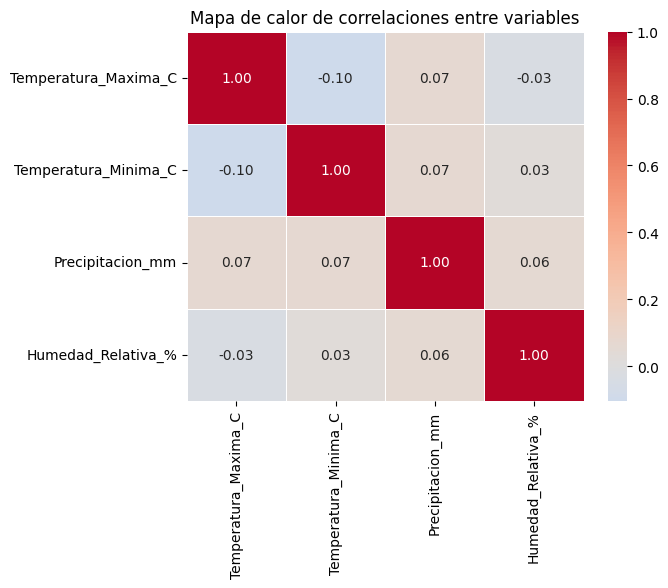

In [ ]:
# Calculando la matriz de correlaciones
correlaciones = df.corr(numeric_only=True)

# Visualizando el mapa de calor a partir de la matriz de correlaciones
sns.heatmap(correlaciones, annot=True, cmap='coolwarm', center=0, fmt=".2f", linewidths=0.5)
plt.title("Mapa de calor de correlaciones entre variables")
plt.show()


Viendo el mapa de calor, es curioso cómo ninguna variable tiene una correlación alta (+ o -) entre sí, ya que todos los valores fuera de la diagonal principal son prácticamente 0. Los valores más altos en magnitud corresponden al cruce entre Temperatura_Maxima_C y Temperatura_Minima_C con un -0.10 pero esto sigue correspondiendo a una correlación muy débil, casi nula.

Siguiendo esta línea, la correlación existente entre las temperaturas es tan baja que en la práctica sugeriría que no hay una relación lineal significativa entre ambas temperaturas. Si la máxima sube, la mínima no tiende a bajar de manera predecible, y viceversa.

Ahora bien, hablando de las temperaturas con respecto a la humedad y precipitación, parecen tampoco tener una relación lineal con la humedad relativa en este dataset simulado.

Finalmente, se puede asegurar que ninguna variable tiene una correlación lineal importante entre sí, y que son independientes al resto.

# Tendencias y promedios

Para complementar la visualización, a continuación se presentan gráficas de tendencias temporales y de promedios mensuales:

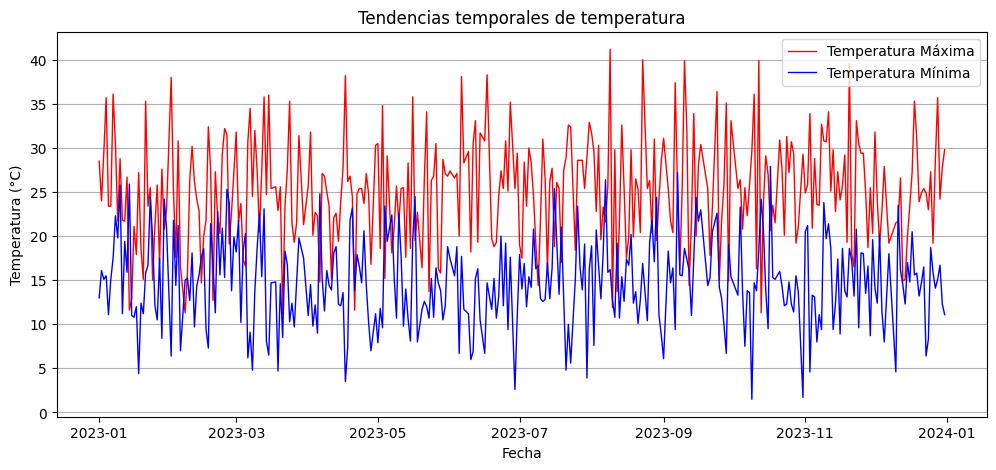

In [ ]:
# Visualizando tendencias temporales
fechas = df["Fecha"]
temp_max = df["Temperatura_Maxima_C"]
temp_min = df["Temperatura_Minima_C"]

plt.figure(figsize=(12, 5))
plt.plot(fechas, temp_max, label="Temperatura Máxima", color="red", lw=1)
plt.plot(fechas, temp_min, label="Temperatura Mínima", color="blue", lw=1)
plt.title("Tendencias temporales de temperatura")
plt.xlabel("Fecha")
plt.ylabel("Temperatura (°C)")
plt.grid(axis="y")
plt.legend()
plt.show()

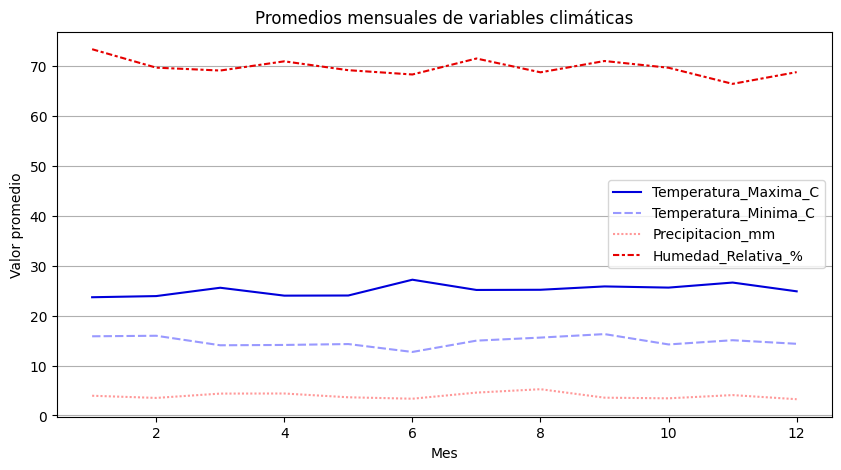

In [ ]:
# Agrupando para ver promedios mensuales

mes_promedio = df.groupby(df["Fecha"].dt.month)[["Temperatura_Maxima_C", "Temperatura_Minima_C", "Precipitacion_mm", "Humedad_Relativa_%"]].mean()

plt.figure(figsize=(10, 5))
sns.lineplot(data=mes_promedio, palette='seismic', lw=1.5)
plt.title("Promedios mensuales de variables climáticas")
plt.xlabel("Mes")
plt.ylabel("Valor promedio")
plt.grid(axis="y")
plt.legend()
plt.show()

En la gráfica de tendencias temporales se observan las variaciones diarias de temperatura máxima y mínima a lo largo del año. Como era de esperarse en datos meteorológicos simulados, se aprecian picos y valles frecuentes que reflejan la variabilidad natural del clima. Sin embargo, no intuiría una estructura estacional normal, ya que hay picos altos — tanto positivos como negativos — que ocurren a lo largo del año, y no solo en épocas esperadas.

No obstante, esta observación podría complementarse con la segunda gráfica que muestra los promedios mensuales de todas las variables. Ahí se ve con mayor claridad que las temperaturas máximas alcanzan sus valores más altos a partir de junio, mientras que los valores promedio de las temperaturas mínimas alcanzan los valores más bajos en junio, detalle que contradice la estacionalidad natural, pero esto podría ser una inconsistencia que se abordará en la siguiente sección.

Por otra parte, se observa un patrón interesante: la humedad relativa se mantiene alta durante todo el año, mientras que la precipitación mensual es baja y bastante estable. Aunque podría parecer incoherente, este comportamiento es plausible en ciertos climas tropicales costeros o subtropicales, donde la atmósfera es rica en humedad pero no siempre se producen las condiciones necesarias para la lluvia. Las temperaturas elevadas a lo largo del año refuerzan esta interpretación. Aún así, al tratarse de datos simulados sin contexto geográfico, estas observaciones deben tomarse con precaución.

## 4. Correción de inconsistencias

En esta etapa se validan reglas lógicas dentro del dataset, como asegurarse de que la temperatura mínima no sea mayor que la máxima, o que los valores de humedad estén dentro del rango permitido (0–100%). También se aplican técnicas de normalización o estandarización para facilitar comparaciones o análisis posteriores.

# Identificando inconsistencias

In [ ]:
# Verificando que la temperatura mínima nunca sea mayor que la máxima
inconsistencias_temp = df[df["Temperatura_Minima_C"] > df["Temperatura_Maxima_C"]]
print(f"Filas con inconsistencia de temperatura: {len(inconsistencias_temp)}")

# Verificando que la humedad relativa esté en el rango 0–100%
inconsistencias_hr = df[(df["Humedad_Relativa_%"] < 0) | (df["Humedad_Relativa_%"] > 100)]
print(f"Filas con inconsistencia de humedad relativa: {len(inconsistencias_hr)}")

Filas con inconsistencia de temperatura: 36
Filas con inconsistencia de humedad relativa: 0


Dado que no hay otra columna de referencia ni valores contextuales, se optará por eliminar esas 36 filas donde hay inconsistencias importantes en las temperaturas.

In [ ]:
# Mostrando filas inconsistentes
display(df[df["Temperatura_Minima_C"] > df["Temperatura_Maxima_C"]])

,Fecha,Temperatura_Maxima_C,Temperatura_Minima_C,Precipitacion_mm,Humedad_Relativa_%
13,2023-01-14,11.6,25.9,4.5,72.0
23,2023-01-24,15.0,19.8,6.7,75.6
26,2023-01-27,16.9,17.5,1.4,80.9
28,2023-01-29,20.8,24.2,1.7,79.3
37,2023-02-07,11.3,15.0,1.2,64.3
44,2023-02-14,14.7,17.6,2.0,74.0
49,2023-02-19,12.7,16.7,3.4,69.5
51,2023-02-21,22.3,22.8,2.9,80.6
56,2023-02-26,19.1,23.8,1.6,73.7
60,2023-03-02,21.6,21.8,12.5,81.1


In [ ]:
# Eliminando filas inconsistentes
df = df[df["Temperatura_Minima_C"] <= df["Temperatura_Maxima_C"]]

# Verificando que efectivamente se hayan eliminado solo esas filas
inconsistencias_temp_2 = df[df["Temperatura_Minima_C"] > df["Temperatura_Maxima_C"]]
print(f"Filas con inconsistencia de temperatura: {len(inconsistencias_temp_2)}")
print(f"Filas restantes: {df.shape[0]}")

Filas con inconsistencia de temperatura: 0
Filas restantes: 303


Como se vio en la sección 2, luego de la limpieza de datos aún se tenían 339 filas, ahora nos quedan 303. Con esto se confirma que se eliminaron solo las 36 con inconsistencias.

### Normalización y estandarización

In [ ]:
# Guardando copia del DataFrame antes de normalizar/estandarizar
df_normalizado = df.copy()
df_estandarizado = df.copy()

# Guardando también las columnas originales
temp_max_original = df["Temperatura_Maxima_C"].copy()
temp_min_original = df["Temperatura_Minima_C"].copy()
precip_original = df["Precipitacion_mm"].copy()
humedad_original = df["Humedad_Relativa_%"].copy()

# Listado de columnas numéricas a normalizar/estandarizar
columnas = ["Temperatura_Maxima_C", "Temperatura_Minima_C", "Precipitacion_mm", "Humedad_Relativa_%"]

# Aplicar la normalización a cada columna
for col in columnas:
  df_normalizado[col] = (df_normalizado[col] - df_normalizado[col].min()) / (df_normalizado[col].max() - df_normalizado[col].min())

# Aplicar la estandarización a cada columna
for col in columnas:
  df_estandarizado[col] = (df_estandarizado[col] - df_estandarizado[col].mean()) / (df_estandarizado[col].std())

Ahora, para verlo de mejor forma, se graficarán estas variables normalizadas y estandarizadas, para compararlas con las originales:

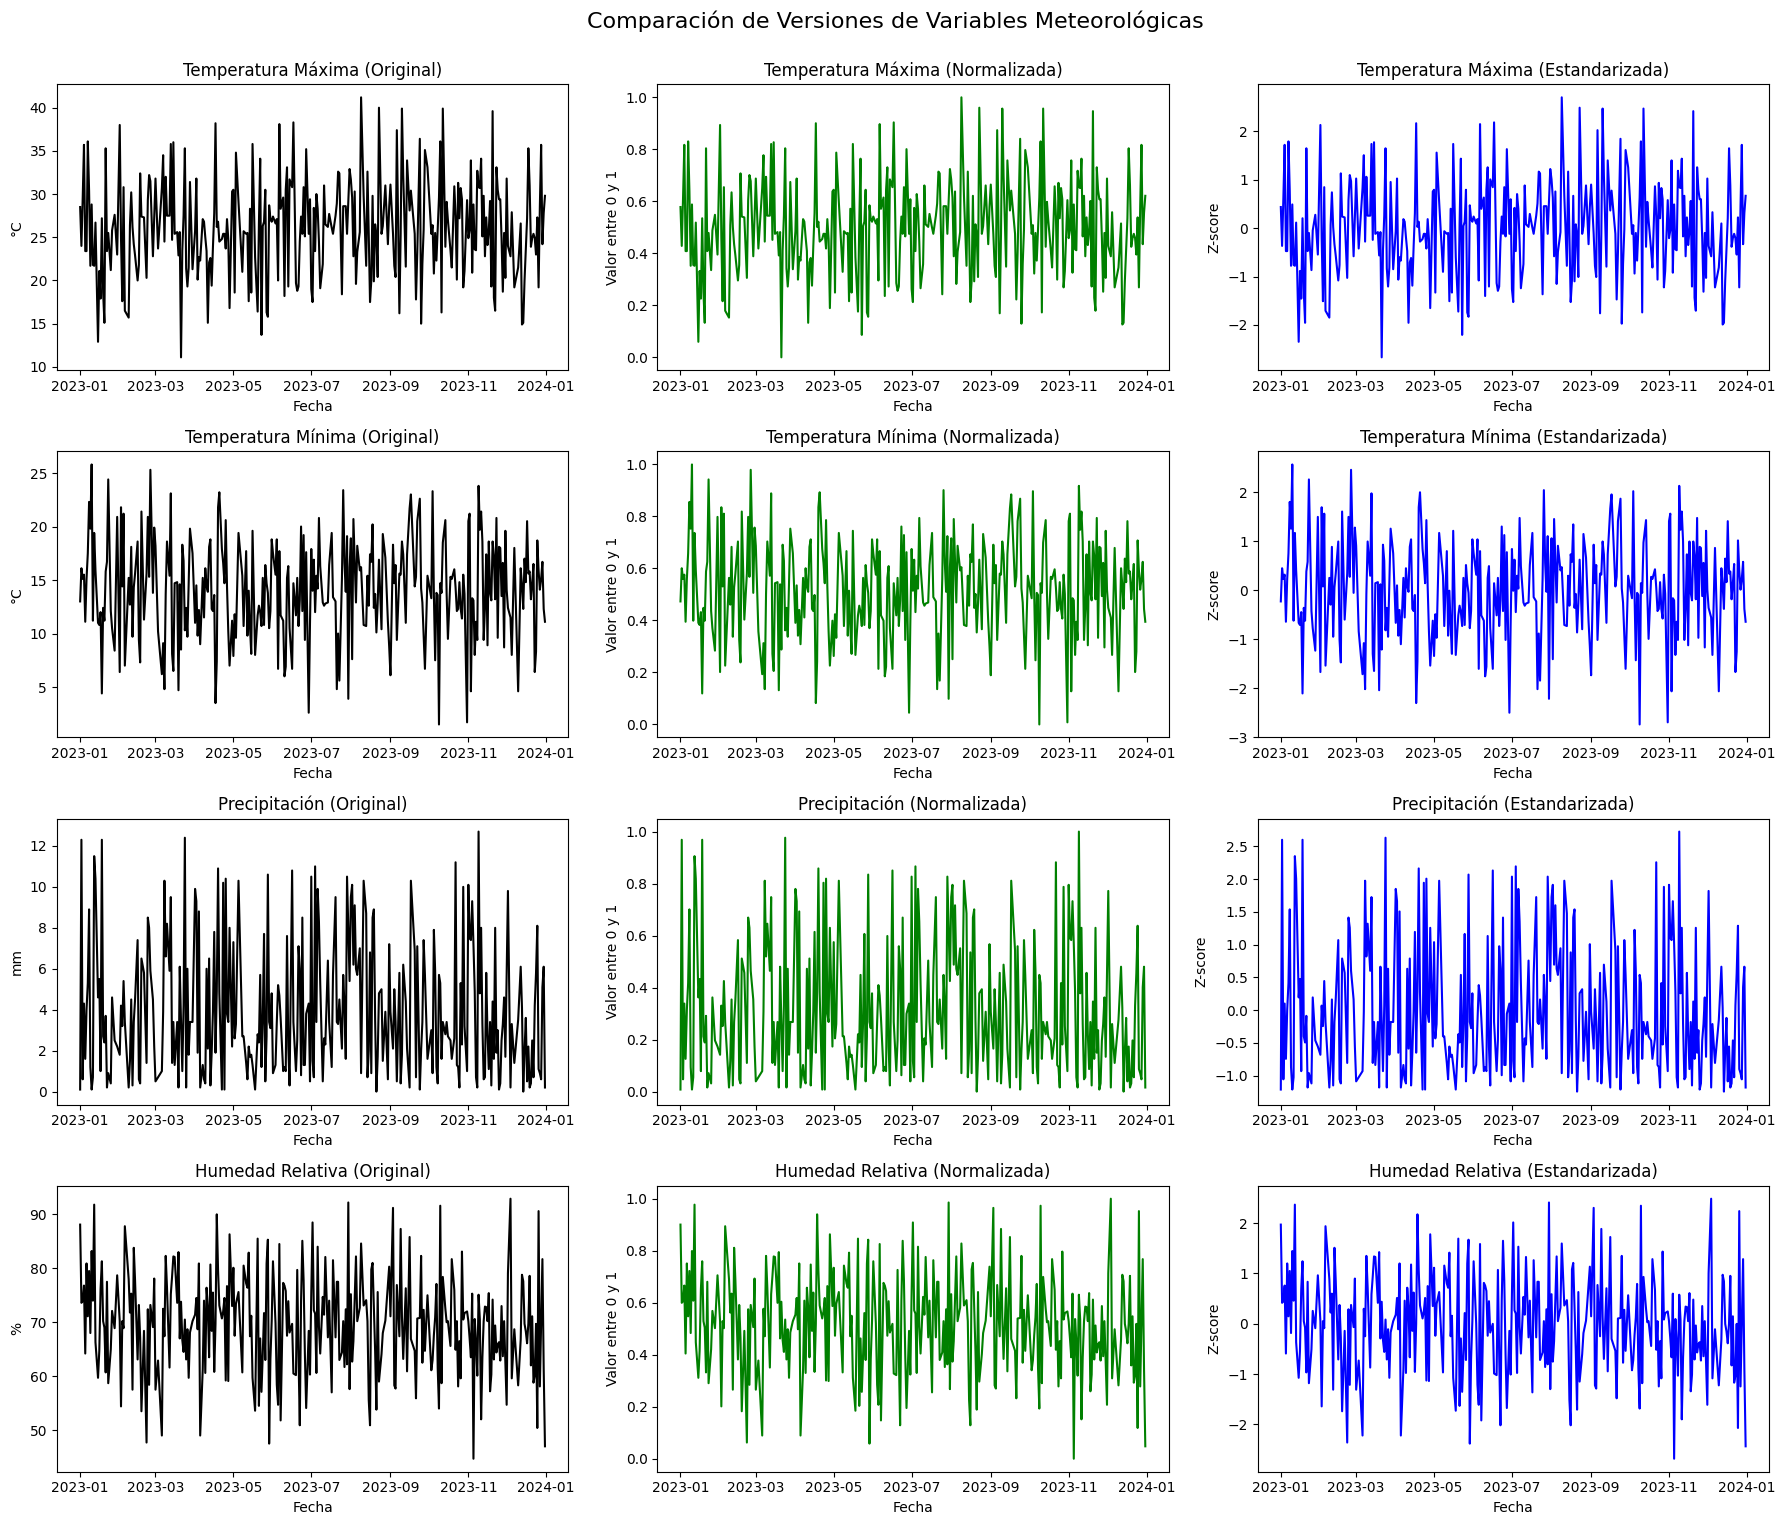

In [ ]:
# Listando las columnas a graficar, con sus títulos, unidades y sus series de datos originales
variables_a_graficar = [
    {"col": "Temperatura_Maxima_C", "tit": "Temperatura Máxima", "y": "°C", "datos_orig": temp_max_original},
    {"col": "Temperatura_Minima_C", "tit": "Temperatura Mínima", "y": "°C", "datos_orig": temp_min_original},
    {"col": "Precipitacion_mm", "tit": "Precipitación", "y": "mm", "datos_orig": precip_original},
    {"col": "Humedad_Relativa_%", "tit": "Humedad Relativa", "y": "%", "datos_orig": humedad_original}
]

# Configurando el grid: 4 filas (una por variable), 3 columnas (original, normalizada, estandarizada)
fig, axes = plt.subplots(
    nrows=len(variables_a_graficar),
    ncols=3,
    figsize=(18, 4 * len(variables_a_graficar)) # Ajustando la altura total de la figura
)
fig.suptitle("Comparación de Versiones de Variables Meteorológicas", fontsize=16, y=1) # Título general para toda la figura

# Usando un bucle para iterar sobre cada variable y crear su fila de gráficos
for i, var_info in enumerate(variables_a_graficar):
    nombre_col = var_info["col"]
    titulo = var_info["tit"]
    etiqueta_y = var_info["y"]
    serie_original = var_info["datos_orig"] # Usando el nombre de la variable local para claridad

    # Columna 1: Gráfico Original
    axes[i, 0].plot(df["Fecha"], serie_original, color='black')
    axes[i, 0].set_title(f"{titulo} (Original)")
    axes[i, 0].set_xlabel("Fecha")
    axes[i, 0].set_ylabel(etiqueta_y)

    # Columna 2: Gráfico Normalizado
    axes[i, 1].plot(df["Fecha"], df_normalizado[nombre_col], color='green')
    axes[i, 1].set_title(f"{titulo} (Normalizada)")
    axes[i, 1].set_xlabel("Fecha")
    axes[i, 1].set_ylabel("Valor entre 0 y 1")

    # Columna 3: Gráfico Estandarizado
    axes[i, 2].plot(df["Fecha"], df_estandarizado[nombre_col], color='blue')
    axes[i, 2].set_title(f"{titulo} (Estandarizada)")
    axes[i, 2].set_xlabel("Fecha")
    axes[i, 2].set_ylabel("Z-score")


# Ajustando el layout para que no se traslapen los títulos y etiquetas, y dejando espacio para los subtítulos
plt.tight_layout(rect=[0, 0.05, 1, 1])
plt.show()

Estas gráficas demuestran visualmente cómo la normalización y la estandarización transforman el rango y la escala de las variables, manteniendo la forma de su distribución original. La normalización ajusta los valores entre 0 y 1, ideal para algoritmos sensibles a la escala, mientras que la estandarización centra los datos alrededor de cero con una desviación estándar de uno, lo cual es útil para modelos que asumen una distribución normal. Se observa cómo a pesar de los cambios en la escala, los patrones temporales propios de cada variable se preservan en todas sus versiones.

## 5. Visualización y conclusión de resultados

En esta etapa final, se presentan las conclusiones a partir de todos el análisis previamente realizado. Ya se han visto varias gráficas y visualizaciones importantes en las secciones anteriores (como el mapa de calor de correlaciones, las tendencias de temperatura y los promedios mensuales), por lo que no incluiré más en esta sección, y así no saturarla.

Aquí el enfoque estará solamente en ver qué significa todo esto para este dataset ya limpio, si serviría para predecir algo y qué más se le podría añadir para que sea aún mejor.

### a. ¿Qué concluyes de este Dataset limpio y tratado?

Después de un intenso proceso de limpieza y preparación, el dataset fue transformado de datos brutos e inconsistentes a una base confiable para el análisis. Se procedió a gestionar los valores nulos y los outliers, utilizando estrategias de eliminación (como en el caso de los outliers iniciales de "Precipitacion_mm") y de imputación con la mediana (para otros outliers y valores remanentes). Este proceso justificó la reducción del dataset de primeramente 365 filas, a 339 en segunda instancia, para finalmente terminar con 303 filas, asegurando la coherencia y representatividad de los datos resultantes.

Al analizar el Mapa de calor de correlaciones (presentado en la Sección 3), se observó que las variables meteorológicas examinadas ("Temperatura_Maxima_C", "Temperatura_Minima_C", "Precipitacion_mm", "Humedad_Relativa_%") muestran una correlación lineal extremadamente baja entre sí. Esto sugiere que a nivel lineal, no existe una relación predecible o fuerte entre ellas. Por ejemplo, la correlación de −0.10 entre "Temperatura_Maxima_C" y "Temperatura_Minima_C" indica una independencia lineal considerable, y así pasa también entre las otras variables.

Las Tendencias temporales de temperatura y los Promedios mensuales (ambas visualizaciones en la Sección 3) revelaron la variabilidad diaria y, en particular, una inconsistencia notoria: las temperaturas mínimas promedio alcanzaban sus valores más bajos en junio. Este hallazgo contradecía la estacionalidad típica del hemisferio norte — donde nos encontramos — y fue un punto clave para corregir en la Sección 4. Además, se observó que la "Humedad_Relativa_%" se mantuvo consistentemente alta, mientras que la "Precipitacion_mm" fue baja y estable; un comportamiento que, aunque singular, es plausible en ciertos climas específicos previamente menxionados, aunque la naturaleza simulada de los datos demanda precaución a la hora de la interpretación final.

En conclusión, se logró un obtener dataset libre de valores nulos y outliers, lo que facilitó su manejo y permitió diversas visualizaciones. No obstante, dada la ya mencionada falta de contexto geográfico y que los datos sean simulados, impide dar una interpretación más precisa en términos de — por ejemplo — cambio climático.

### b. ¿Cómo podría ayudar en modelos de predicción?

Un dataset con la calidad y consistencia obtenidas mediante el proceso de limpieza es importante para el desarrollo de modelos predictivos "robustos". La eliminación de ruido e inconsistencias asegura que el modelo aprenda de datos fiables, incrementando la precisión y confiabilidad de sus pronósticos.

*   Predicción de patrones: A pesar de las débiles correlaciones lineales, este dataset puede servir de base para identificar y predecir patrones temporales. Por ejemplo, se podrían aplicar técnicas de series temporales para pronosticar futuros valores de "Temperatura_Maxima_C" o "Humedad_Relativa_%" basándose en su comportamiento histórico. Incluso para la "Precipitacion_mm", aunque baja y variable, se podrían desarrollar modelos que predigan la probabilidad de eventos de lluvia, identificando así condiciones específicas que los hayan precedido.
*   Base para modelos avanzados: La limpieza de datos podría permitir que el dataset sea apto para el entrenamiento de modelos de ML que busquen relaciones más complejas o no lineales entre las variables para predecir condiciones meteorológicas futuras.
*   Detección de anomalías "operativas": En un contexto de datos reales, un modelo entrenado con este dataset limpio podría ser utilizado para identificar rápidamente valores anómalos que en lugar de representar fenómenos climáticos extremos, podrían incluso indicar fallos en los equipos de medición.

### c. ¿Le agregarías otras columnas para un mejor análisis y predicciones? ¿Cuáles y por qué?

Sí, para enriquecer sustancialmente el análisis y potenciar la capacidad predictiva, la inclusión de variables adicionales sería muy beneficiosa. Las columnas que se podrían considerar y sus justificaciones son las siguientes:

*   Presión atmosférica (hPa/mbar): Se trata de un indicador muy importante en meteorología, ya que los sistemas de alta y baja presión están directamente asociados con las condiciones climáticas (buen tiempo, nubosidad, precipitación). Su incorporación permitiría a los modelos conocer mejor su correlación, capturar la dinámica atmosférica y por lo tanto, predecir eventos.
*   Punto de rocío (°C): Este valor es un indicador más preciso de la humedad absoluta en el aire y de la sensación térmica de "bochorno", así como de la probabilidad de niebla o precipitación incluso, en comparación con la humedad relativa por sí sola. Un punto de rocío cercano a la temperatura ambiente indica saturación del aire y alta probabilidad de condensación.
*   Velocidad y dirección del viento (m/s, grados): Estos datos en este dataset ayudarían a comprender el movimiento de las masas de aire, la dispersión de fenómenos (contaminantes, niebla, etc.) y la predicción de la sensación térmica. Básicamente permiten prever el desplazamiento de sistemas meteorológicos.
*   Radiación solar (W/m² o kWh/m2/día): Es el principal motor del sistema climático, influyendo directamente en la temperatura de la superficie, la evaporación y los ciclos diarios de energía. Es fundamental para modelos de pronóstico de temperatura y para aplicaciones como la energía solar, por lo que tenerlo en un dataset de este estilo sería un plus.
*   Cobertura nubosa (% o tipo de nubes): La cantidad y el tipo de nubes afectan significativamente la temperatura, la cantidad de luz solar incidente y la probabilidad de precipitación. Saber todo esto sin duda mejoraría la precisión de las predicciones de temperatura y lluvia sobretodo.
*   Altitud de la estación (m): Tener este tipo de datos mejoraría la calidad del análisis, ya que en un dataset real con múltiples ubicaciones, la altitud de la estación meteorológica es un factor bastante importante, dado que las condiciones atmosféricas (temperatura, presión) varían considerablemente con la altura.


















